In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from tqdm import tqdm
from glob import glob
import os

In [2]:
FIRSTDATE = '1972-12'
LASTDATE = '1977-05'
monthRange = np.arange(np.datetime64(FIRSTDATE,'M'),np.datetime64(LASTDATE,'M'))

In [3]:
HEMISPHERE = 'N'
DATADIR = 'D:/N5ESMR/N5ESMR_out/ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_NH-fv1.1'

SIE_NH_15 = np.ones(len(monthRange))*np.nan
SIE_NH_30 = np.ones(len(monthRange))*np.nan
i=-1
for date in tqdm(monthRange):
    i+=1
    date_s = str(date)
    year = date_s[:4]
    month = date_s[5:7]
    dataFile = os.path.join(DATADIR,"ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_" + HEMISPHERE + "H-"+year+month+"*-fv1.1.nc")
    files = glob(dataFile)
    if len(files)>10:
        SIC = []
        for f in files:
            ds = xr.load_dataset(f)
            cSIC = ds.ice_conc.to_numpy().squeeze()
            SIC.append(cSIC)
        mSIC = np.nanmean(np.stack(SIC),axis=0)
        SIE_NH_15[i] = np.sum(mSIC>15)*25**2
        SIE_NH_30[i] = np.sum(mSIC>30)*25**2

  0%|          | 0/53 [00:00<?, ?it/s]C:\Users\emilt\AppData\Local\Temp\ipykernel_26704\2296780993.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  2%|▏         | 1/53 [00:01<01:27,  1.69s/it]C:\Users\emilt\AppData\Local\Temp\ipykernel_26704\2296780993.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  4%|▍         | 2/53 [00:02<01:14,  1.47s/it]C:\Users\emilt\AppData\Local\Temp\ipykernel_26704\2296780993.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  6%|▌         | 3/53 [00:04<01:07,  1.35s/it]C:\Users\emilt\AppData\Local\Temp\ipykernel_26704\2296780993.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
 13%|█▎        | 7/53 [00:05<00:28,  1.63it/s]C:\Users\emilt\AppData\Local\Temp\ipykernel_26704\2296780993.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
 15%|█▌        | 8/53 [00:06<00:33,  1.35it/s]C:

In [4]:
HEMISPHERE = 'S'
DATADIR = 'D:/N5ESMR/N5ESMR_out/ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_SH-fv1.1'

SIE_SH_15 = np.ones(len(monthRange))*np.nan
SIE_SH_30 = np.ones(len(monthRange))*np.nan
i=-1
for date in tqdm(monthRange):
    i+=1
    date_s = str(date)
    year = date_s[:4]
    month = date_s[5:7]
    dataFile = os.path.join(DATADIR,"ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_" + HEMISPHERE + "H-"+year+month+"*-fv1.1.nc")
    files = glob(dataFile)
    if len(files)>10:
        SIC = []
        for f in files:
            ds = xr.load_dataset(f)
            cSIC = ds.ice_conc.to_numpy().squeeze()
            SIC.append(cSIC)
        mSIC = np.nanmean(np.stack(SIC),axis=0)
        SIE_SH_15[i] = np.sum(mSIC>15)*25**2
        SIE_SH_30[i] = np.sum(mSIC>30)*25**2

  0%|          | 0/53 [00:00<?, ?it/s]C:\Users\emilt\AppData\Local\Temp\ipykernel_26704\2551452898.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  2%|▏         | 1/53 [00:01<00:56,  1.08s/it]C:\Users\emilt\AppData\Local\Temp\ipykernel_26704\2551452898.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  4%|▍         | 2/53 [00:02<01:09,  1.36s/it]C:\Users\emilt\AppData\Local\Temp\ipykernel_26704\2551452898.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
  6%|▌         | 3/53 [00:04<01:08,  1.37s/it]C:\Users\emilt\AppData\Local\Temp\ipykernel_26704\2551452898.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
 13%|█▎        | 7/53 [00:05<00:30,  1.52it/s]C:\Users\emilt\AppData\Local\Temp\ipykernel_26704\2551452898.py:20: RuntimeWarning: Mean of empty slice
  mSIC = np.nanmean(np.stack(SIC),axis=0)
 15%|█▌        | 8/53 [00:07<00:36,  1.22it/s]C:

In [5]:
df_nh = pd.DataFrame({'Date':monthRange,
                   'SIE_NH_30%[km^2]':SIE_NH_30
                   })
df_sh = pd.DataFrame({'Date':monthRange,
                   'SIE_SH_30%[km^2]':SIE_SH_30
                   })

df_nh.to_csv('N5ESMR_SIArea_NH_197212-197705.csv',index=False)
df_sh.to_csv('N5ESMR_SIArea_SH_197212-197705.csv',index=False)

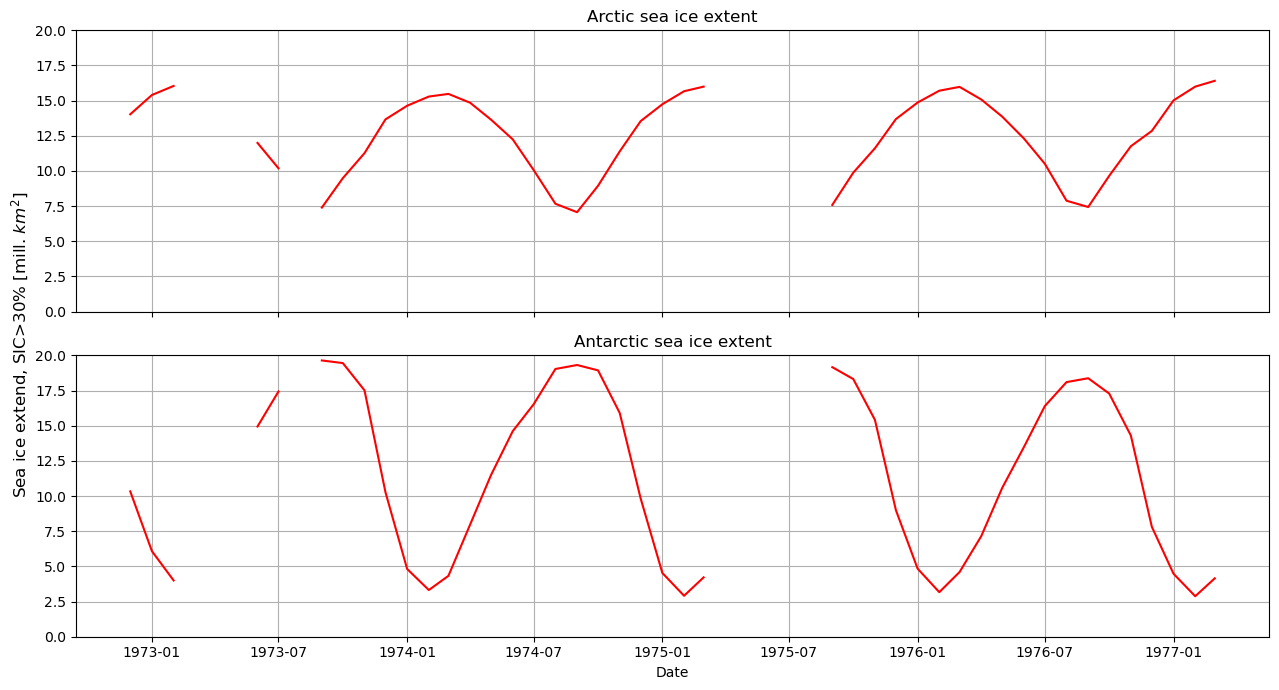

In [20]:
fig, ax = plt.subplots(2,1,figsize=(13,7),sharex=True,layout='tight')
ax[0].plot(monthRange,SIE_NH_30/1e6,'r-')
ax[0].grid()
ax[0].set_title('Arctic sea ice extent')
#ax[0].set_ylabel('Sea ice extend, SIC>30% [mill. $km^2$]')
#ax[0].set_xlabel('Date')
ax[0].set_ylim([0,20])


ax[1].plot(monthRange,SIE_SH_30/1e6,'r-')
ax[1].grid()
ax[1].set_title('Antarctic sea ice extent')
#ax[1].set_ylabel('Sea ice extend, SIC>30% [mill. $km^2$]')
ax[1].set_xlabel('Date')
ax[1].set_ylim([0,20])

fig.supylabel('Sea ice extend, SIC>30% [mill. $km^2$]')
plt.savefig('N5ESMR_SIE.pdf', bbox_inches='tight')

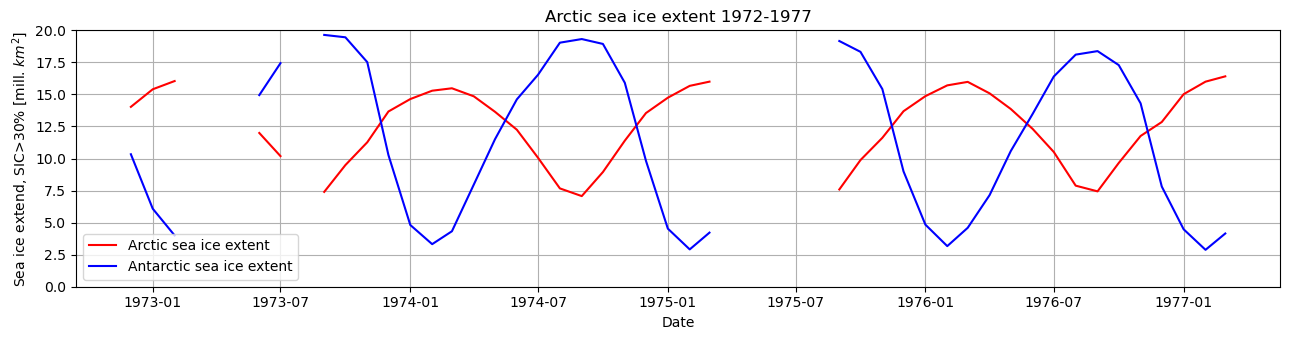

In [21]:
fig, ax = plt.subplots(1,1,figsize=(13,3.5),sharex=True,layout='tight')
ax.plot(monthRange,SIE_NH_30/1e6,'r-',label='Arctic sea ice extent')
ax.plot(monthRange,SIE_SH_30/1e6,'b-',label='Antarctic sea ice extent')
ax.grid()
ax.set_title('Arctic sea ice extent 1972-1977')
ax.set_ylabel('Sea ice extend, SIC>30% [mill. $km^2$]')
ax.set_xlabel('Date')
ax.set_ylim([0,20])
ax.legend()

#fig.supylabel('Sea ice extend, SIC>30% [mill. $km^2$]')
#plt.savefig('N5ESMR_SIE.pdf', bbox_inches='tight')

In [7]:
osisaf_sie_nh = pd.read_csv('osisaf_nh_sie_monthly.txt',sep=' ',skiprows=7,names=['dec_year','year','month','date','sie'])
osisaf_sie_nh  = osisaf_sie_nh[osisaf_sie_nh['sie']!=-999]

osisaf_sie_sh = pd.read_csv('osisaf_sh_sie_monthly.txt',sep=' ',skiprows=7,names=['dec_year','year','month','date','sie'])
osisaf_sie_sh  = osisaf_sie_sh[osisaf_sie_sh['sie']!=-999]

osisaf_sia_nh = pd.read_csv('osisaf_nh_sia_monthly.txt',sep=' ',skiprows=7,names=['dec_year','year','month','date','sia'])
osisaf_sia_nh  = osisaf_sia_nh[osisaf_sia_nh['sia']!=-999]

osisaf_sia_sh = pd.read_csv('osisaf_sh_sia_monthly.txt',sep=' ',skiprows=7,names=['dec_year','year','month','date','sia'])
osisaf_sia_sh  = osisaf_sia_sh[osisaf_sia_sh['sia']!=-999]

In [8]:
import numpy as np
import pandas as pd

def decimal_years_to_datetime64(decimal_years):
    """
    Convert an array of decimal years to np.datetime64.
    
    Parameters:
        decimal_years (array-like): 1D array of decimal years (e.g., [2023.5, 2024.25])
    
    Returns:
        np.ndarray of np.datetime64[D]
    """
    decimal_years = np.asarray(decimal_years)
    years = decimal_years.astype(int)
    remainders = decimal_years - years

    # Get whether each year is a leap year
    is_leap = pd.to_datetime([f"{y}-12-31" for y in years]).dayofyear == 366
    days_in_year = np.where(is_leap, 366, 365)

    # Calculate days to add
    days = remainders * days_in_year
    base_dates = pd.to_datetime([f"{y}-01-01" for y in years])
    final_dates = base_dates + pd.to_timedelta(days, unit='D')

    return final_dates.to_numpy(dtype="datetime64[D]")

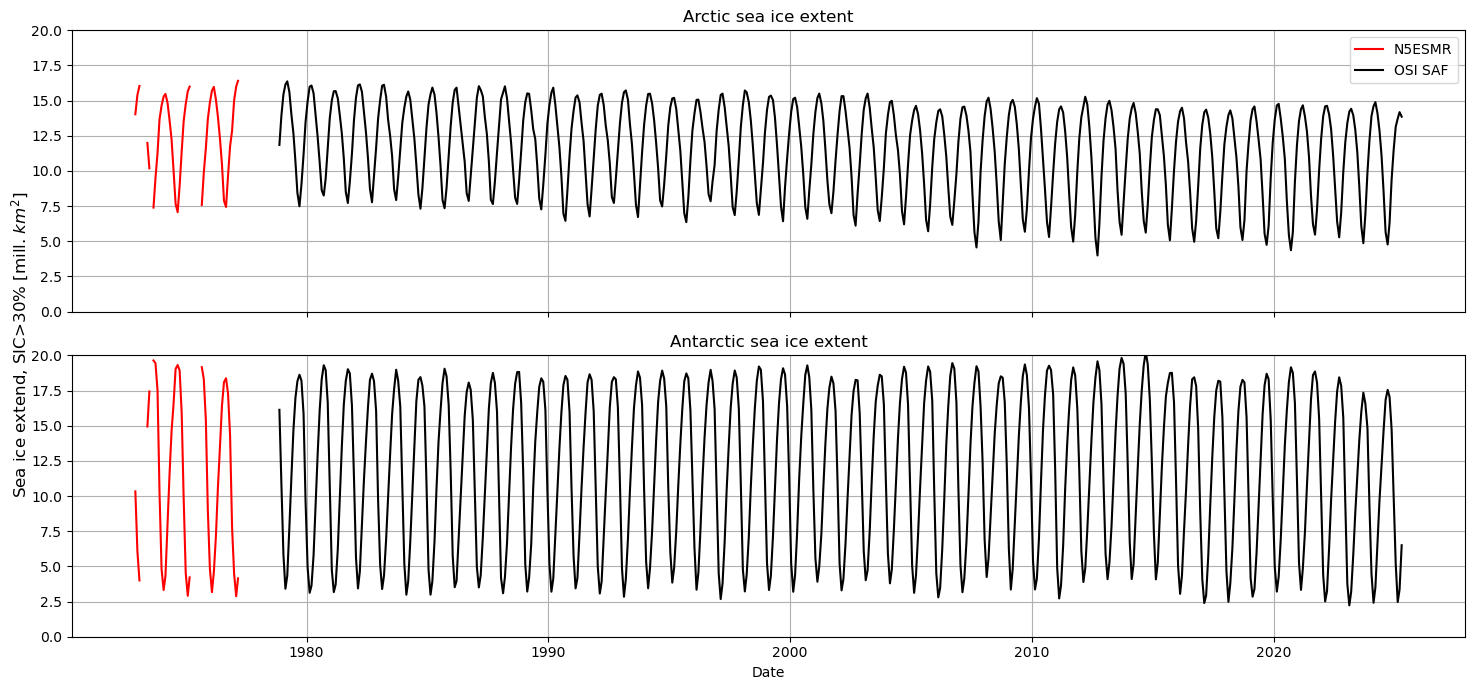

In [30]:
fig, ax = plt.subplots(2,1,figsize=(15,7),sharex=True,layout='tight')
ax[0].plot(monthRange,SIE_NH_30/1e6,'r-', label='N5ESMR')
ax[0].plot(decimal_years_to_datetime64(osisaf_sie_nh['dec_year']),osisaf_sie_nh['sie']/1e6,'k-', label='OSI SAF')
ax[0].grid()
ax[0].set_title('Arctic sea ice extent')
#ax[0].set_ylabel('Sea ice extend, SIC>30% [mill. $km^2$]')
#ax[0].set_xlabel('Date')
ax[0].set_ylim([0,20])
ax[0].legend()


ax[1].plot(monthRange,SIE_SH_30/1e6,'r-')
ax[1].plot(decimal_years_to_datetime64(osisaf_sie_sh['dec_year']),osisaf_sie_sh['sie']/1e6,'k-')
ax[1].grid()
ax[1].set_title('Antarctic sea ice extent')
#ax[1].set_ylabel('Sea ice extend, SIC>30% [mill. $km^2$]')
ax[1].set_xlabel('Date')
ax[1].set_ylim([0,20])

fig.supylabel('Sea ice extend, SIC>30% [mill. $km^2$]')
plt.savefig('N5ESMR_SIE_osisaf.pdf', bbox_inches='tight')